In [1]:
import hist
from hist import Hist
import numpy as np

In [2]:
h = Hist(hist.axis.Regular(bins=50, start=0, stop=1, name="x"),
         hist.axis.Regular(bins=50, start=0, stop=1, name="y"))
h

Hist(
  Regular(50, 0, 1, name='x', label='x'),
  Regular(50, 0, 1, name='y', label='y'),
  storage=Double())

In [3]:
N = 1000
x = np.random.normal(0.5, 0.1, size=N)
y = np.random.normal(0.5, 0.05, size=N)
x,y

(array([0.5577548 , 0.69149976, 0.56724293, 0.44899871, 0.41900522,
        0.5767778 , 0.49432063, 0.53757827, 0.54377186, 0.49355001,
        0.49940818, 0.41904412, 0.45320934, 0.43045282, 0.45762509,
        0.47609087, 0.46488825, 0.34010793, 0.45800961, 0.59092592,
        0.46248588, 0.57046009, 0.60186967, 0.55451018, 0.3874093 ,
        0.60428873, 0.43474717, 0.49795378, 0.47454185, 0.45894445,
        0.46298835, 0.48050252, 0.48671823, 0.54430704, 0.64202352,
        0.43462359, 0.45398233, 0.50569057, 0.47202197, 0.64757273,
        0.40922758, 0.60867455, 0.39637732, 0.48886307, 0.54614587,
        0.39928674, 0.65967859, 0.64889059, 0.36014801, 0.57460948,
        0.45282849, 0.71540141, 0.41613078, 0.61166537, 0.55949223,
        0.69072232, 0.54194541, 0.57989893, 0.6017398 , 0.41321618,
        0.43160832, 0.55916432, 0.66099119, 0.48632213, 0.5438737 ,
        0.55094707, 0.53800605, 0.42987928, 0.48132717, 0.54587841,
        0.29947559, 0.6480688 , 0.32091472, 0.49

In [4]:
h.fill(x,y)

Hist(
  Regular(50, 0, 1, name='x', label='x'),
  Regular(50, 0, 1, name='y', label='y'),
  storage=Double()) # Sum: 1000.0

In [5]:
h.view()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
h[2,2] = 40
h

Hist(
  Regular(50, 0, 1, name='x', label='x'),
  Regular(50, 0, 1, name='y', label='y'),
  storage=Double()) # Sum: 1040.0

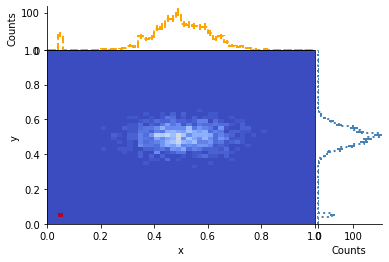

In [7]:
h.plot2d_full(
    main_cmap="coolwarm",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
);

In [8]:
import inspect
import mplhep

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fd5fe298e50>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fd5fe298ee0>, text=[])

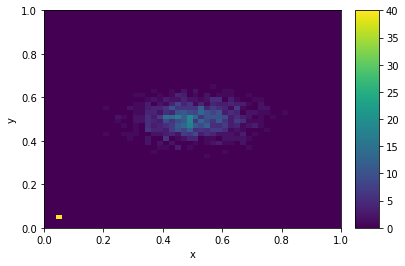

In [9]:
mplhep.hist2dplot(h)

In [10]:
h1 = h.project('x')
h2 = h.project('y')
h1

Hist(Regular(50, 0, 1, name='x', label='x'), storage=Double()) # Sum: 1040.0

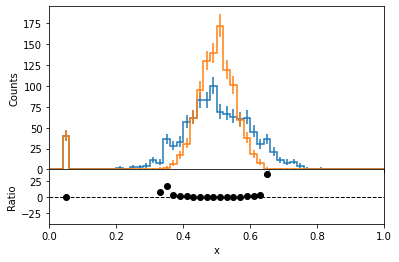

In [11]:
h1.plot_ratio(h2, rp_uncert_draw_type="bar", rp_uncertainty_type='poisson');

In [12]:
inspect.signature(h1.plot_ratio)

<Signature (other: 'hist.BaseHist | Callable[[np.typing.NDArray[Any]], np.typing.NDArray[Any]] | str', *, ax_dict: 'dict[str, matplotlib.axes.Axes] | None' = None, **kwargs: 'Any') -> 'tuple[MainAxisArtists, RatiolikeArtists]'>

In [13]:
h

Hist(
  Regular(50, 0, 1, name='x', label='x'),
  Regular(50, 0, 1, name='y', label='y'),
  storage=Double()) # Sum: 1040.0

In [14]:
h[{h.axes[1].name : sum}]

Hist(Regular(50, 0, 1, name='x', label='x'), storage=Double()) # Sum: 1040.0

In [15]:
h.axes[1].name

'y'

In [17]:
h.axes[1].label

'y'